# PHASE-2

## Data Cleaning & Manipulation

## Objective

The goal of this phase is to clean and prepare the **restaurant sales dataset** by handling missing values, removing duplicates, fixing inconsistencies, and ensuring correct data types. This ensures high-quality data for accurate analysis and modeling.

The aim of this phase is to clean the dataset by:

* Handling missing values
* Removing duplicates
* Fixing inconsistencies
* Ensuring correct data types

This prepares the dataset for **meaningful analysis** and **insightful decision-making**.


In [2]:
# Importing required libraries
import pandas as pd

# Load dataset
df=pd.read_csv(r"/Users/prasannakumarreddy/Downloads/restaurant_sales_dataset.csv")
# Display first 5 rows
df.head()


,Order_ID,Date,Restaurant_Name,Location,Item_Category,Quantity,Price_per_Item,Total_Sales,Payment_Method,Customer_Age,Customer_Gender,Delivery_Status
0,1,2023-01-01,Grill House,Chicago,Pizza,3,30.46,91.38,Credit Card,57.0,Other,NaN
1,2,2023-01-02,Urban Bites,NaN,Salad,8,21.45,NaN,Credit Card,24.0,NaN,NaN
2,3,2023-01-03,Spice Junction,NaN,Burger,8,47.13,377.04,Cash,22.0,Female,NaN
3,4,2023-01-04,Urban Bites,Phoenix,NaN,2,7.47,14.94,Debit Card,64.0,Female,Delivered
4,5,2023-01-05,Urban Bites,Los Angeles,Burger,4,35.30,141.20,UPI,59.0,Female,NaN


### 1. Check Missing Values
Missing values reduce data quality. Let's check how many null values are present in each column.


In [3]:
# Check missing values
df.isnull().sum()

Order_ID             0
Date                 0
Restaurant_Name    450
Location           450
Item_Category      450
Quantity             0
Price_per_Item       0
Total_Sales        450
Payment_Method     450
Customer_Age       450
Customer_Gender    450
Delivery_Status    450
dtype: int64

- Since We observed missing values in **Restaurant_Name,Location,Item_Category,Total_Sales,Payment_Method,Customer_Age,Customer_Gender,Delivery_Status**,


### 2. Handle Missing Values

We will use simple but effective strategies:

* **Categorical columns** (`Restaurant_Name`, `Location`, `Item_Category`, `Payment_Method`, `Customer_Gender`, `Delivery_Status`) → fill with `"Unknown"` or mode (most frequent value).
* **Numerical columns** (`Total_Sales`, `Quantity`, `Price_per_Item`, `Customer_Age`) → fill with **median** to avoid skew.
* **Date column** (`Date`) → fill using **forward-fill** (`ffill`) to maintain the chronological sequence.


In [4]:
# Fill missing text data with "Unknown"
for col in ['Restaurant_Name', 'Location', 'Item_Category', 'Payment_Method', 'Customer_Gender', 'Delivery_Status']:
    df[col] = df[col].fillna("Unknown")


In [5]:
# Fill missing numerical columns with median
for col in ['Total_Sales', 'Quantity', 'Price_per_Item', 'Customer_Age']:
    df[col] = df[col].fillna(df[col].median())


In [6]:
# Converting improper dates and NaN values to NaT (Not a Time)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Fill missing dates with a fixed placeholder (e.g., today's date or a default)
df['Date'] = df['Date'].fillna(pd.to_datetime("2025-01-01"))


**Observation:**

* Text columns missing values were filled with **"Unknown"**.
* Numerical columns (`Total_Sales`, `Quantity`, `Price_per_Item`, `Customer_Age`) were imputed with the **median** value.
* The `Date` column was converted to **datetime** format and missing values were replaced with **`2025-01-01`**.


In [8]:
df.isna().sum()

Order_ID           0
Date               0
Restaurant_Name    0
Location           0
Item_Category      0
Quantity           0
Price_per_Item     0
Total_Sales        0
Payment_Method     0
Customer_Age       0
Customer_Gender    0
Delivery_Status    0
dtype: int64

## 3. Check and Remove Duplicates
Duplicate rows can bias the results, so we must ensure there are none.


In [9]:
# Remove Duplicates(if any)
df.drop_duplicates()

# Count Duplicates
df.duplicated().sum()

0

### Result:
**0 duplicates** , The dataset is already unique and clean in this aspect.



### 4. Rename & Standardize Column Names
For better readability, we change column names to **First Letter Capital**.
give me like this

In [10]:
# Standardize column names (First letter capital)
df.columns = df.columns.str.strip().str.capitalize()

# check columns 
df.columns

Index(['Order_id', 'Date', 'Restaurant_name', 'Location', 'Item_category',
       'Quantity', 'Price_per_item', 'Total_sales', 'Payment_method',
       'Customer_age', 'Customer_gender', 'Delivery_status'],
      dtype='object')

### 5. Fix Inconsistencies in Categorical Data

We standardize text-based columns (like `Restaurant_Name`, `Location`, `Item_Category`, `Payment_Method`, `Customer_Gender`, `Delivery_Status`) by **trimming spaces** and **unifying case**.


In [14]:
# Standardize text columns
for col in ['Restaurant_name', 'Location', 'Item_category', 'Payment_method', 'Customer_gender', 'Delivery_status']:
    df[col] = df[col].str.strip().str.title()


**Observation:** Text values in `Restaurant_Name`, `Location`, `Item_Category`, `Payment_Method`, `Customer_Gender`, and `Delivery_Status` columns were **cleaned** and **standardized** (e.g., `" pizza "` → `"Pizza"`).


### 6. Convert Data Types
We ensure each column has the correct type.


In [16]:
# Convert numeric columns
df['Quantity'] = df['Quantity'].astype(int)
df['Price_per_item'] = df['Price_per_item'].astype(float)
df['Total_sales'] = df['Total_sales'].astype(float)
df['Customer_age'] = df['Customer_age'].astype(int)


**Observation:**

* All numeric columns (`Quantity`, `Price_per_Item`, `Total_Sales`, `Customer_Age`) were successfully converted to appropriate numeric data types.


In [18]:
# Convert to category
for col in ['Restaurant_name', 'Location', 'Item_category', 'Payment_method', 'Customer_gender', 'Delivery_status']:
    df[col] = df[col].astype('category')


**Observation:**

* Categorical columns (`Restaurant_Name`, `Location`, `Item_Category`, `Payment_Method`, `Customer_Gender`, `Delivery_Status`) were converted to **category** datatype for efficient analysis.
* The `Date` column was already handled earlier.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_id         3000 non-null   int64         
 1   Date             3000 non-null   datetime64[ns]
 2   Restaurant_name  3000 non-null   category      
 3   Location         3000 non-null   category      
 4   Item_category    3000 non-null   category      
 5   Quantity         3000 non-null   int64         
 6   Price_per_item   3000 non-null   float64       
 7   Total_sales      3000 non-null   float64       
 8   Payment_method   3000 non-null   category      
 9   Customer_age     3000 non-null   int64         
 10  Customer_gender  3000 non-null   category      
 11  Delivery_status  3000 non-null   category      
dtypes: category(6), datetime64[ns](1), float64(2), int64(3)
memory usage: 159.6 KB


### 7) Non-Visual Bivariate Analysis

* **Categorical × Categorical:** Relationship between `Level` and `Goal`.
* **Categorical × Numeric:** Average `Total_exercises` grouped by `Level`.
* **Numeric × Numeric:** Correlation between `Program_length` and `Total_exercises`.


In [28]:
# Categorical vs Categorical: Restaurant_name vs Payment_method
pd.crosstab(df['Restaurant_name'], df['Payment_method'])

Payment_method,Cash,Credit Card,Debit Card,Unknown,Upi
Restaurant_name,,,,,
Foodie Hub,92,131,123,69,118
Grill House,125,116,117,63,98
Spice Junction,92,110,99,80,97
Tasty Treats,117,104,95,77,103
Unknown,94,115,81,80,80
Urban Bites,98,95,124,81,126


In [33]:
# Categorical vs Numerical: Avg Quantity by Payment_method
df.groupby('Payment_method', observed=False)['Quantity'].mean().reset_index()


,Payment_method,Quantity
0,Cash,4.796117
1,Credit Card,5.014903
2,Debit Card,5.106416
3,Unknown,5.131111
4,Upi,5.032154


In [34]:
# Numerical vs Numerical: Correlation between Quantity and Price_per_item
df[['Quantity', 'Price_per_item']].corr()


,Quantity,Price_per_item
Quantity,1.000000,0.000811
Price_per_item,0.000811,1.000000


## DATA VISUALIZATION

## UNIVARIATE

## customer age

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


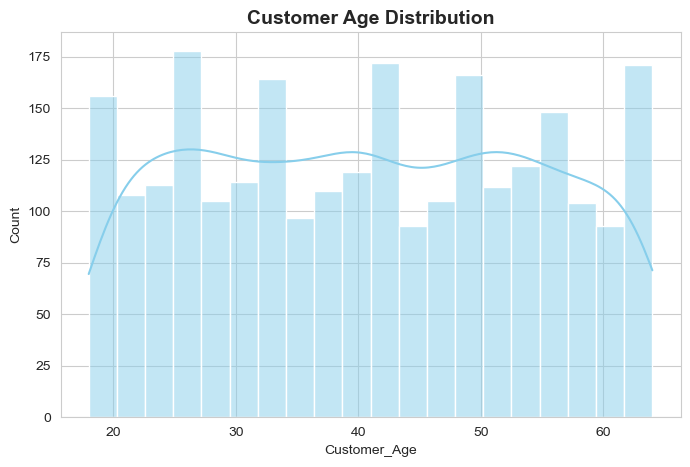

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8,5))

# Create histogram for Customer Age
sns.histplot(df["Customer_Age"], bins=20, kde=True, color="skyblue")

# Add title
plt.title("Customer Age Distribution", fontsize=14, fontweight='bold')

# Show the plot
plt.show()


## **Observation:**
- The customer age distribution shows that **most customers are in the young to middle-age range**, while **fewer customers fall into the older and very young age groups**. This indicates that the restaurant primarily serves **working-age adults**.



## payment method

/var/folders/wf/vv49qmhs36319wcz44__vpmw0000gn/T/ipykernel_1274/1667689990.py:9: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x="Payment_Method", data=df, hue="Payment_Method", palette=colors, legend=False)


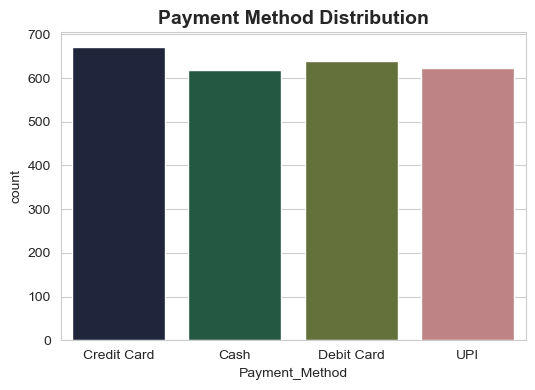

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
colors = sns.color_palette("cubehelix")

# Create the countplot
plt.figure(figsize=(6,4))
sns.countplot(x="Payment_Method", data=df, hue="Payment_Method", palette=colors, legend=False)

# Add title
plt.title("Payment Method Distribution", fontsize=14, fontweight='bold')

# Show the plot
plt.show()


## bivariate

# categorial vs categorial

## countplot

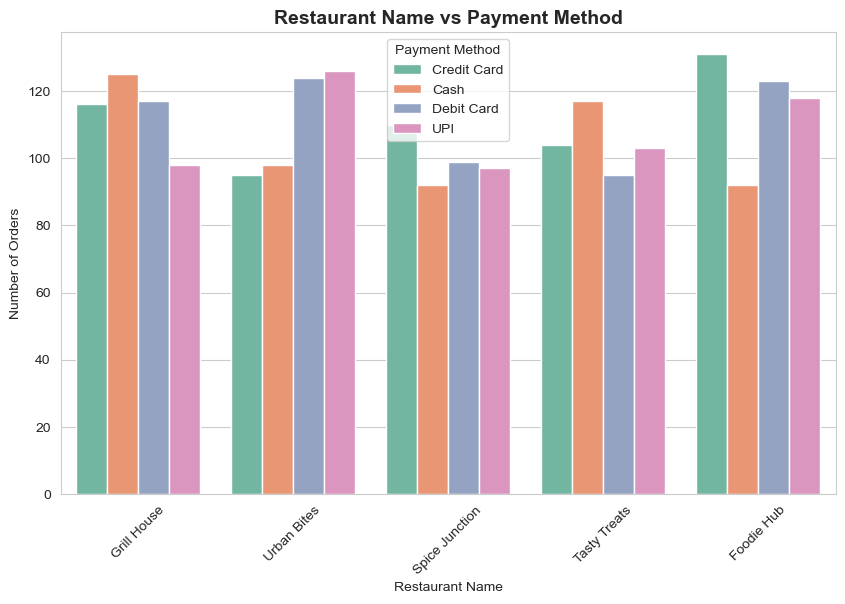

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10,6))

# Bivariate countplot
sns.countplot(x="Restaurant_Name", hue="Payment_Method", data=df, palette="Set2")

# Add title and labels
plt.title("Restaurant Name vs Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("Restaurant Name")
plt.ylabel("Number of Orders")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend(title="Payment Method")

# Show the plot
plt.show()


**Observation:**

* This shows how **payment methods differ across restaurants**, helping identify which payment option is used **more frequently** at specific restaurants.


# HEAT MAP

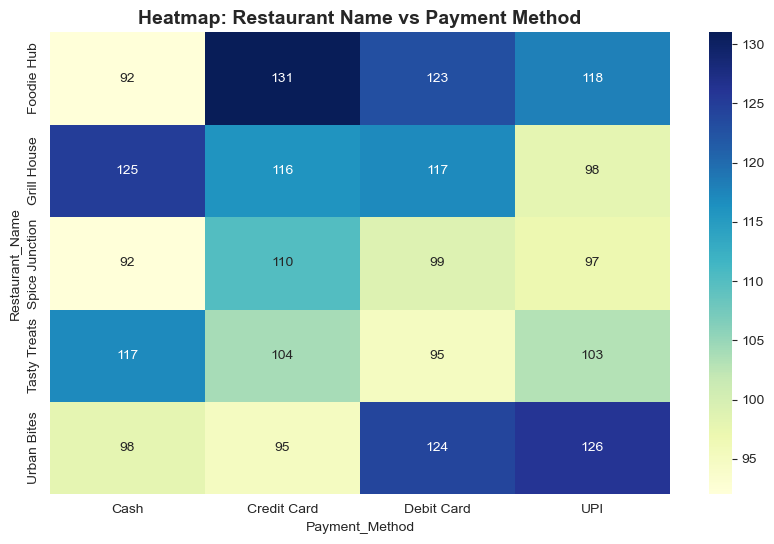

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create crosstab for Restaurant vs Payment Method
ct = pd.crosstab(df["Restaurant_Name"], df["Payment_Method"])

# Set figure size
plt.figure(figsize=(10,6))

# Create heatmap
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")

# Add title
plt.title("Heatmap: Restaurant Name vs Payment Method", fontsize=14, fontweight="bold")

# Show plot
plt.show()

### Categorical vs Numerical

/var/folders/wf/vv49qmhs36319wcz44__vpmw0000gn/T/ipykernel_1274/556044345.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Restaurant_Name", y="Total_Sales", data=df, palette="Set2")


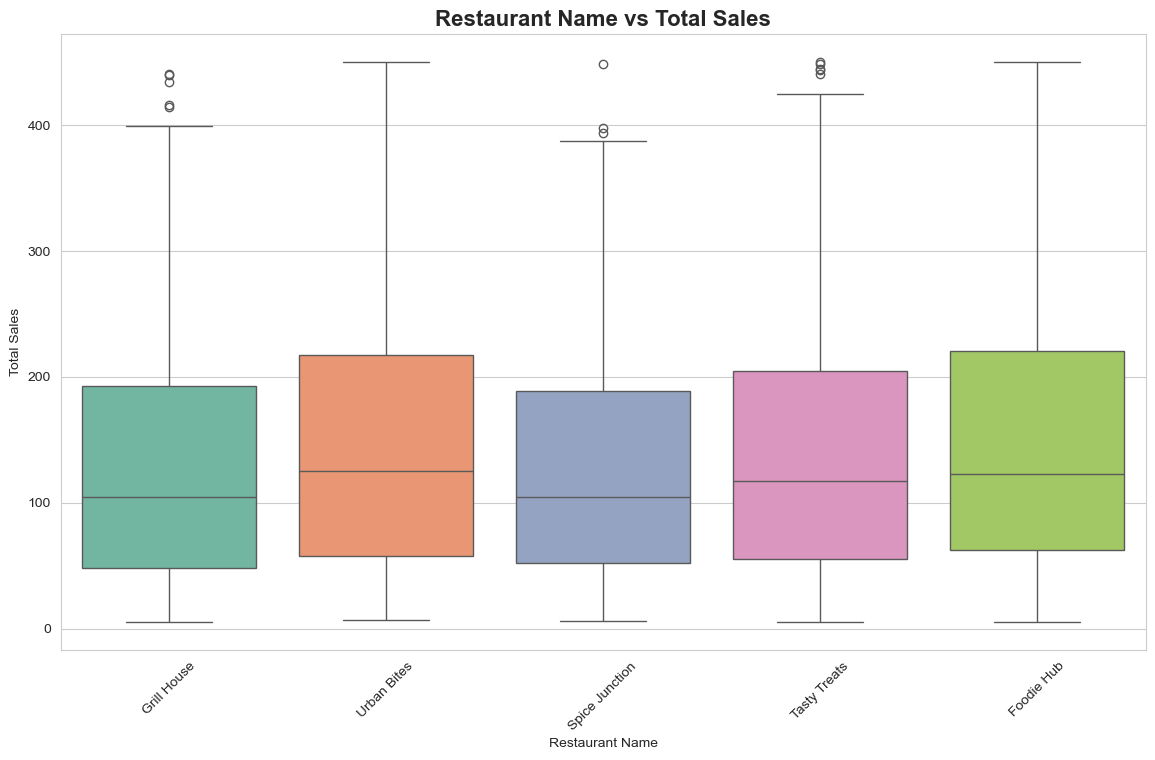

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14,8))

# Create boxplot
sns.boxplot(x="Restaurant_Name", y="Total_Sales", data=df, palette="Set2")

# Add title and labels
plt.title("Restaurant Name vs Total Sales", fontsize=16, fontweight='bold')
plt.xlabel("Restaurant Name")
plt.ylabel("Total Sales")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [24]:
df.head()

,Order_ID,Date,Restaurant_Name,Location,Item_Category,Quantity,Price_per_Item,Total_Sales,Payment_Method,Customer_Age,Customer_Gender,Delivery_Status
0,1,2023-01-01,Grill House,Chicago,Pizza,3,30.46,91.38,Credit Card,57.0,Other,NaN
1,2,2023-01-02,Urban Bites,NaN,Salad,8,21.45,NaN,Credit Card,24.0,NaN,NaN
2,3,2023-01-03,Spice Junction,NaN,Burger,8,47.13,377.04,Cash,22.0,Female,NaN
3,4,2023-01-04,Urban Bites,Phoenix,NaN,2,7.47,14.94,Debit Card,64.0,Female,Delivered
4,5,2023-01-05,Urban Bites,Los Angeles,Burger,4,35.30,141.20,UPI,59.0,Female,NaN


/var/folders/wf/vv49qmhs36319wcz44__vpmw0000gn/T/ipykernel_1274/3490766596.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


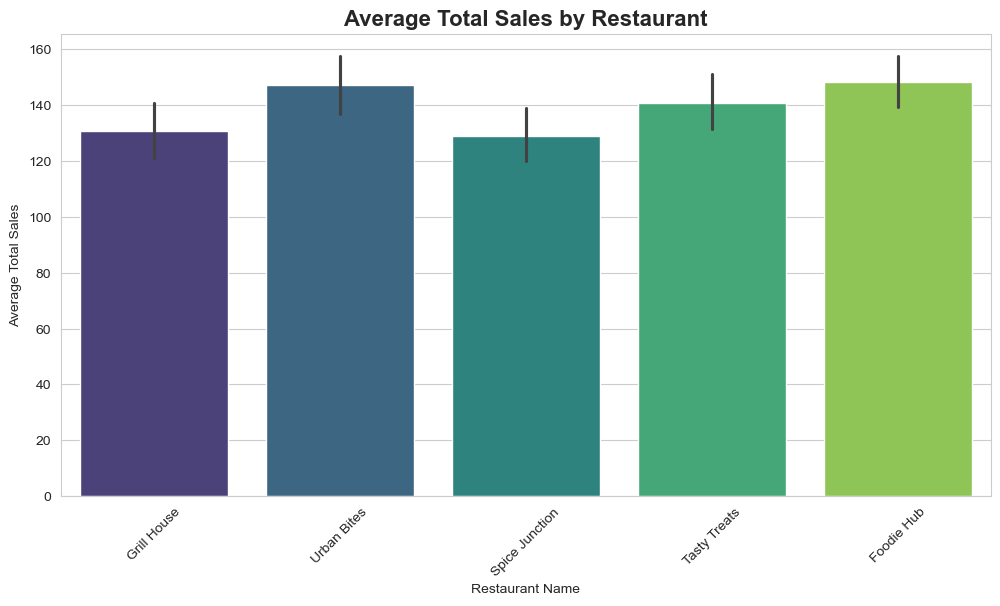

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set figure size
plt.figure(figsize=(12,6))

# Create barplot
sns.barplot(
    x="Restaurant_Name", 
    y="Total_Sales", 
    data=df, 
    estimator=np.mean, 
    palette="viridis"
)

# Add title and labels
plt.title("Average Total Sales by Restaurant", fontsize=16, fontweight='bold')
plt.xlabel("Restaurant Name")
plt.ylabel("Average Total Sales")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Observation:** Certain restaurants generate higher average total sales, indicating better performance and customer demand.


## numerical vs numerical

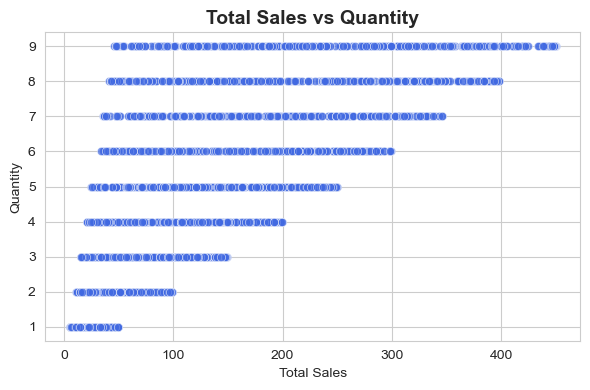

Correlation: 0.6948740558558139


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(6,4))

# Scatter plot for numerical vs numerical
sns.scatterplot(x="Total_Sales", y="Quantity", data=df, color="royalblue", alpha=0.7)

# Title & labels
plt.title("Total Sales vs Quantity", fontsize=14, fontweight="bold")
plt.xlabel("Total Sales")
plt.ylabel("Quantity")

plt.tight_layout()
plt.show()

# Correlation value
print("Correlation:", df["Total_Sales"].corr(df["Quantity"]))


## observation -
- There is a **positive correlation** between **Total Sales** and **Quantity** — as the number of items sold --- increases, the total sales also tend to increase.


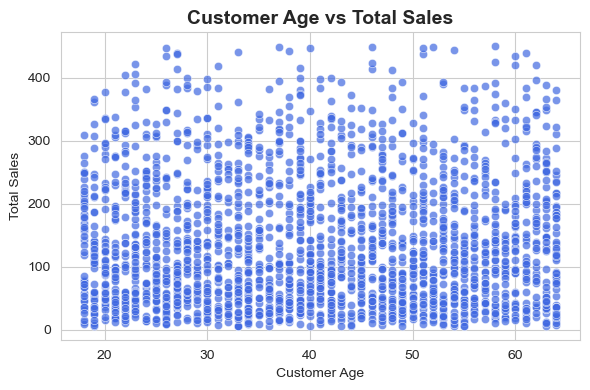

Correlation: 0.013176460806482488


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(6,4))

# Scatter plot: Customer_Age vs Total_Sales
sns.scatterplot(x="Customer_Age", y="Total_Sales", data=df, color="royalblue", alpha=0.7)

# Title & labels
plt.title("Customer Age vs Total Sales", fontsize=14, fontweight="bold")
plt.xlabel("Customer Age")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

# Correlation value
print("Correlation:", df["Customer_Age"].corr(df["Total_Sales"]))

## observation 
- There is a **weak correlation** between **Customer Age** and **Total Sales**, indicating that age has minimal influence on the amount spent.


### Multivariate Analysis

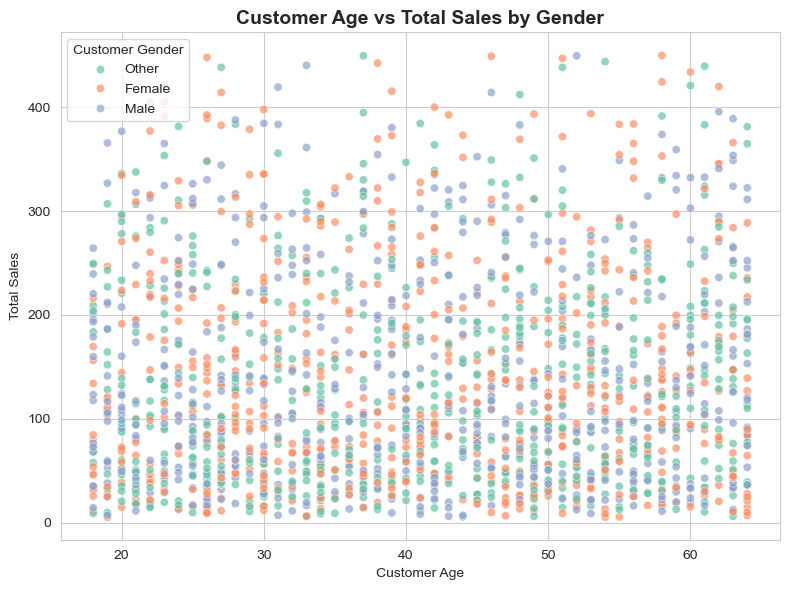

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8,6))

# Multivariate scatter plot
sns.scatterplot(
    x="Customer_Age",
    y="Total_Sales",
    hue="Customer_Gender",
    data=df,
    palette="Set2",
    alpha=0.7
)

# Add title and labels
plt.title("Customer Age vs Total Sales by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Customer Age")
plt.ylabel("Total Sales")

plt.legend(title="Customer Gender")
plt.tight_layout()
plt.show()


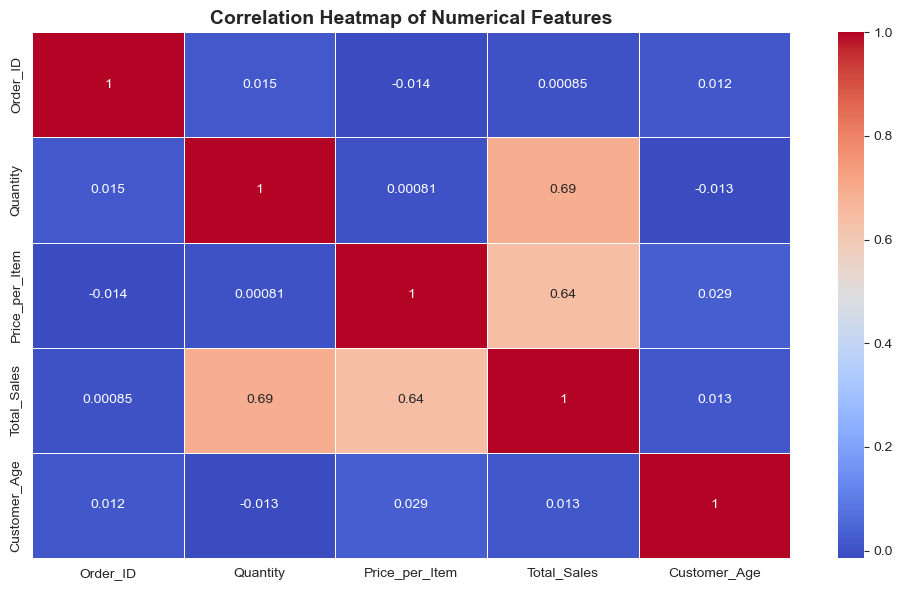

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10,6))

# Generate correlation heatmap for numeric columns only
sns.heatmap(
    df.corr(numeric_only=True),  # Only numeric columns
    annot=True,                 # Show correlation values
    cmap="coolwarm",            # Color theme
    linewidths=0.5              # Line width between cells
)

# Add title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()


## pie plot

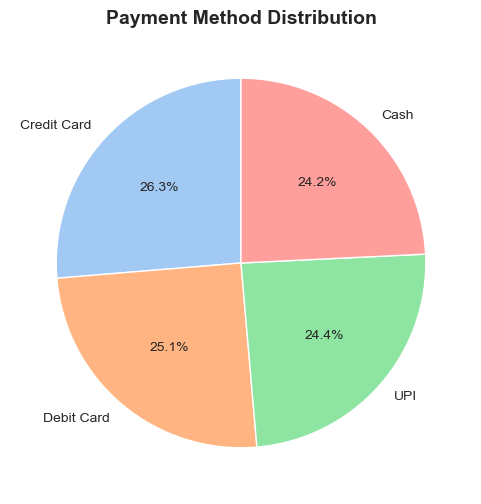

In [41]:
plt.figure(figsize=(6,6))
df["Payment_Method"].value_counts().plot(
    kind="pie", autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution", fontsize=14, fontweight="bold")
plt.ylabel("")
plt.show()


## Observation:**
- The pie chart shows the **distribution of payment methods** among customers, indicating which payment option is **most preferred** and which ones are **less commonly used**.


## Observation:
- Crosstab shows the relationship between Item_category and Payment_method.

- On average, the total sales tend to increase for categories with higher quantity sold.

- A positive correlation exists between Total_sales and Quantity, meaning higher quantities generally lead to higher sales.

- Range of Correlation:

- +1 → Perfect Positive Relation

- 0 → No Relation

- -1 → Perfect Negative Relation


## Final Summary
This project started with raw restaurant sales data — incomplete, inconsistent, and unstructured.
Through careful cleaning and manipulation, we transformed it into a dataset that is **clear, consistent, and ready for analysis**.

## Key Outcomes:
- Missing values were handled smartly.

- Column names and categories were standardized.

- Null values were replaced and data types corrected.

- Early insights showed positive relations, like higher quantities generally leading to higher total sales.

---

** In the end, this dataset is not just cleaned — it is prepared to tell its story with accuracy and clarity**.